In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
img=cv.imread('image2.jpg')   #reading img/ 0 for grayscale/ 1 default
cv.imshow('image2.jpg',img)
cv.waitKey(0)

-1

In [9]:
print(img.shape)        #2d since grayscale
print(img.size)
img.dtype

(1200, 690)
828000


dtype('uint8')

In [3]:
img1=cv.imread('image2.jpg') 
print(img1.shape)

(1200, 690, 3)


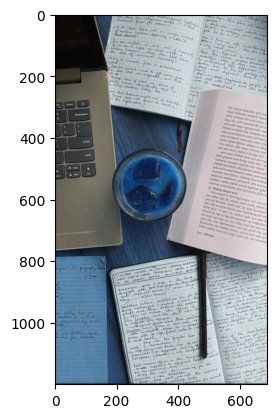

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img1)               #plt stores as rgb, opencv stores as bgr

In [16]:

# to solve this we split and merge channels
b , g , r = cv.split(img)

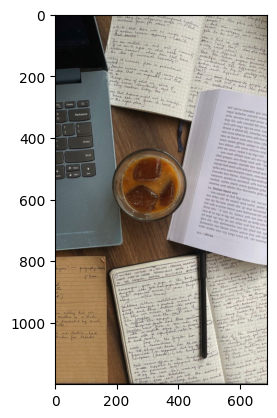

In [17]:
im_merged=cv.merge((r,g,b))
plt.imshow(im_merged)

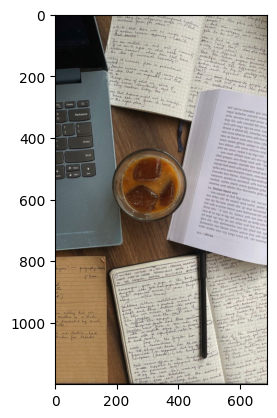

In [21]:
im_rgb= img[:, :, ::-1 ]
plt.imshow(im_rgb)

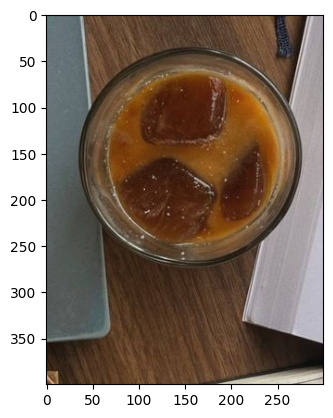

In [24]:
img_crop= im_rgb[400:800,150:450]
plt.imshow(img_crop)

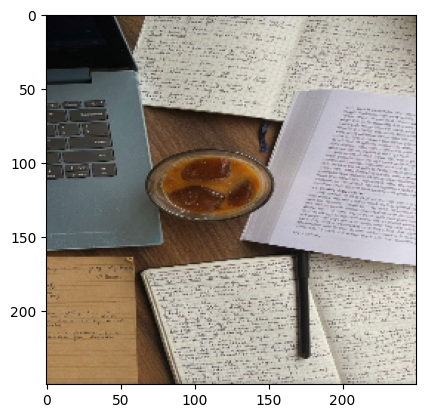

In [28]:
dim=[250,250]
img_resized= cv.resize(im_rgb,dim,fx=1.5,fy=1.5)
plt.imshow(img_resized)

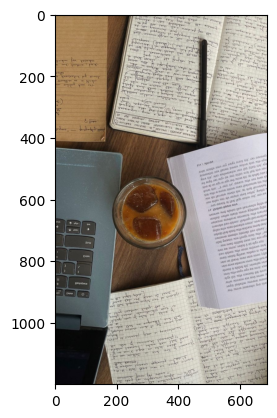

In [30]:
img_flip=cv.flip(im_rgb,0)      #0 for x axis, 1 for y axis, -1 for both
plt.imshow(img_flip)

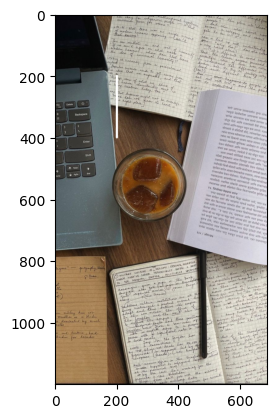

In [ ]:
line_img=img.copy()
cv.line(line_img,(200,200),(200,400),color=(255,255,255),thickness=5)
plt.imshow(line_img[:,:,::-1])

# (255, 0, 0) represents blue.
# (0, 255, 0) represents green.
# (0, 0, 255) represents red.
# (255, 255, 255) represents white.
# (0, 0, 0) represents black.

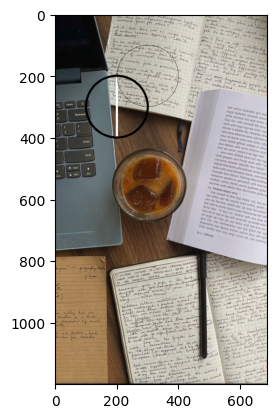

In [41]:
cv.circle(line_img,(200,300),100,(0,0,0),thickness=5)
plt.imshow(line_img[:,:,::-1])

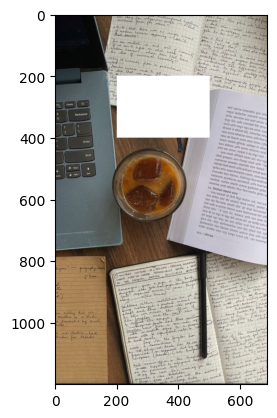

In [45]:
line_img=img.copy()
cv.rectangle(line_img,(200,200),(500,400),color=(255,255,255),thickness=-5)
plt.imshow(line_img[:,:,::-1])
#Thickness of the circle outline (if positive). If a negative value is supplied for this argument, it will result in a filled rectangle.

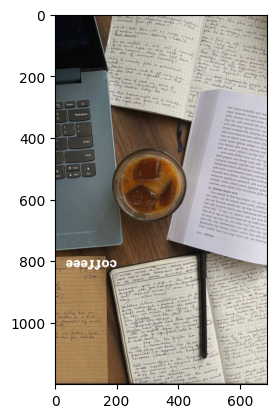

In [ ]:
txt_img=img.copy()
cv.putText(txt_img,"coffeee",(200,800),fontFace=cv.FONT_HERSHEY_COMPLEX_SMALL,fontScale=-2,color=(255,255,255),thickness=3)
plt.imshow(txt_img[:,:,::-1])
#-ve font scale gives inverted text

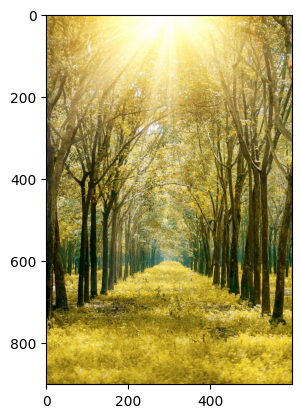

In [6]:
# addition can result in brightness change
# multiplication can be used to improve the contrast of the image
#Contrast is the difference in the intensity values of the pixels of an image. 
# Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

sun=cv.imread('sun.jpg')
sun_rgb=cv.cvtColor(sun,cv.COLOR_BGR2RGB)
plt.imshow(sun_rgb)


np.float64(img_rgb)

Converts the image to 64-bit float format.

This is done because pixel values are originally in uint8 (0–255), and we need to allow values temporarily >255 when increasing brightness.

Float format prevents data overflow during multiplication.

cv2.multiply(..., matrix2)

This multiplies each pixel (or each channel value) in the image by the corresponding value in matrix2.

matrix2 can be:

A scalar (e.g., 1.2 to increase brightness by 20%).

Or a 3-element array for channel-wise adjustment (e.g., [1.2, 1.1, 1.0] to brighten R and G more than B).

np.uint8(...)

After multiplication, values might exceed 255 or go below 0.

This clips values automatically to the valid range (0–255) and converts back to image format (uint8).

✅ Why this is done:
To increase brightness by multiplying pixel intensities.
Multiplying RGB values >1.0 makes the image brighter, <1.0 makes it darker.



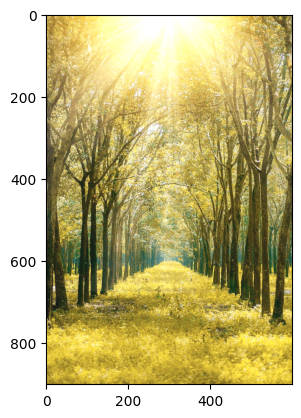

In [12]:
import numpy as np
mat=np.ones(sun.shape,dtype="uint8")*20
mat1=np.ones(sun.shape,dtype="uint8")*0.75

sun_brighter=cv.add(sun_rgb,mat)
sun_darker=cv.subtract(sun_rgb,mat)

sun_highcon=np.uint8(cv.multiply(np.float64(sun_rgb),mat1))
plt.imshow(sun_brighter)

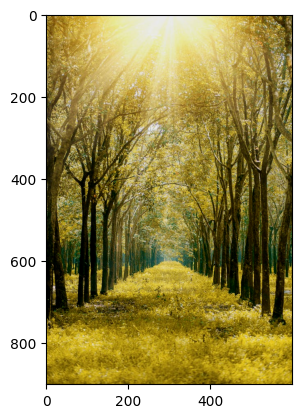

In [13]:
plt.imshow(sun_darker)

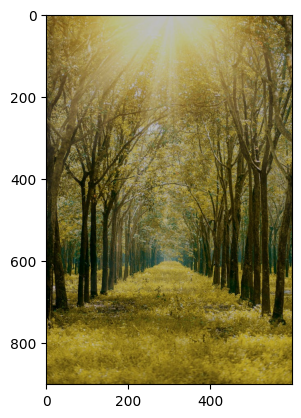

In [14]:
plt.imshow(sun_highcon)

### video

In [4]:
capt=cv.VideoCapture('dog.mp4',0)
while True:
    isTrue, frame=capt.read()
    cv.imshow('video',frame)
    if cv.waitKey(20) & 0xFF==ord('a'): break                                             #video

capt.release()
cv.destroyAllWindows()



In [ ]:
def rescale(frame,scale=0.50):
    w=int(frame.shape[1]*scale)
    h=int(frame.shape[0]*scale)
    dimensions=(w,h)
    return cv.resize(frame,dimensions)

In [ ]:
capt=cv.VideoCapture('dog.mp4')
while True:
    isTrue, frame=capt.read()
    rs_frame=rescale(frame)
    cv.imshow('video',frame)
    cv.imshow('video resized',rs_frame)
    if cv.waitKey(20) & 0xFF==ord('a'): 
        break                                             #video resizing

capt.release()
cv.destroyAllWindows()

In [ ]:
img=cv.imread('image2.jpg')   #reading img
rs_img=rescale(img)
cv.imshow('image2.jpg',rs_img)
cv.waitKey(0)

-1